In [1]:
pip install --upgrade tensorflow

    100% |████████████████████████████████| 195.6MB 243kB/s ta 0:00:012   33% |██████████▊                     | 65.2MB 61.2MB/s eta 0:00:03    34% |███████████                     | 67.8MB 2.9MB/s eta 0:00:45    39% |████████████▋                   | 76.9MB 5.3MB/s eta 0:00:23    51% |████████████████▋               | 101.2MB 4.6MB/s eta 0:00:21    52% |█████████████████               | 103.6MB 6.1MB/s eta 0:00:16    57% |██████████████████▌             | 113.4MB 5.2MB/s eta 0:00:16█████████████████▊             | 114.4MB 2.4MB/s eta 0:00:35    60% |███████████████████▍            | 118.6MB 5.5MB/s eta 0:00:15    74% |████████████████████████        | 146.3MB 5.7MB/s eta 0:00:09
    100% |████████████████████████████████| 6.0MB 3.1MB/s ta 0:00:01
    100% |████████████████████████████████| 1.0MB 4.1MB/s ta 0:00:01
    100% |████████████████████████████████| 71kB 5.9MB/s ta 0:00:01
    100% |████████████████████████████████| 471kB 5.4MB/s ta 0:00:01
    100% |██████████████████████████

    100% |████████████████████████████████| 3.6MB 3.3MB/s ta 0:00:011
    100% |████████████████████████████████| 163kB 6.2MB/s ta 0:00:01
    100% |████████████████████████████████| 153kB 5.3MB/s ta 0:00:01
    100% |████████████████████████████████| 81kB 4.6MB/s ta 0:00:01
  Stored in directory: /Users/cuongthan/Library/Caches/pip/wheels/b1/c2/ed/d62208260edbd3fa7156545c00ef966f45f2063d0a84f8208a
  Stored in directory: /Users/cuongthan/Library/Caches/pip/wheels/7c/06/54/bc84598ba1daf8f970247f550b175aaaee85f68b4b0c5ab2c6
Successfully built wrapt termcolor
tables 3.5.1 requires mock>=2.0, which is not installed.
astroid 2.2.5 requires typed-ast>=1.3.0; implementation_name == "cpython", which is not installed.
  Found existing installation: setuptools 40.8.0
    Uninstalling setuptools-40.8.0:
      Successfully uninstalled setuptools-40.8.0
  Found existing installation: six 1.12.0
    Uninstalling six-1.12.0:
      Successfully uninstalled six-1.12.0
  Found existing installation: pro

In [2]:
import tensorflow as tf

tf.__version__

'2.5.0'

In [4]:
mnist = tf.keras.datasets.mnist #28x28 images of hand-written digits 0-9

In [16]:
(x_train,y_train),(x_test,y_test) = mnist.load_data()

In [17]:
x_train.shape

(60000, 28, 28)

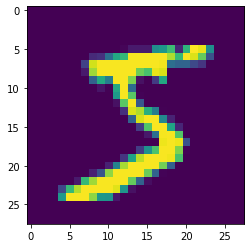

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

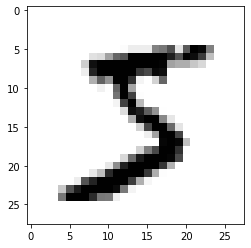

In [11]:
plt.imshow(x_train[0],cmap = plt.cm.binary)
plt.show()

In [18]:
#scaling data

x_train = tf.keras.utils.normalize(x_train,axis = 1)
x_test = tf.keras.utils.normalize(x_test,axis = 1)

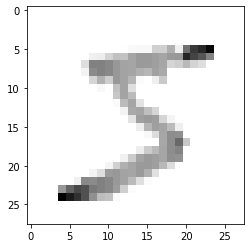

In [13]:
plt.imshow(x_train[0],cmap = plt.cm.binary)
plt.show()

In [21]:
#Build the model

model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten()) #add first layer? why flatten?

model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #128 nodes, 
model.add(tf.keras.layers.Dense(128, activation=tf.nn.relu)) #128 nodes, 
model.add(tf.keras.layers.Dense(10, activation=tf.nn.softmax)) #128 nodes, output layer

model.compile(optimizer = 'adam', loss = 'sparse_categorical_crossentropy',
             metrics = ['accuracy'])

model.fit(x_train,y_train,epochs = 3)

Epoch 1/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.2615 - accuracy: 0.9233
Epoch 2/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.1053 - accuracy: 0.9673
Epoch 3/3
1875/1875 [==============================] - 3s 1ms/step - loss: 0.0722 - accuracy: 0.9767


In [23]:
#Test the model with test set

val_loss, val_acc = model.evaluate(x_test,y_test)
print(val_loss,val_acc)

313/313 [==============================] - 0s 980us/step - loss: 0.0886 - accuracy: 0.9716
0.08860155194997787 0.9715999960899353


In [24]:
#Save the model

model.save('first_num_reader.model')

INFO:tensorflow:Assets written to: first_num_reader.model/assets


In [26]:
#Load the model
new_model = tf.keras.models.load_model('first_num_reader.model')

In [27]:
#Make predictions
predictions = new_model.predict(x_test)

In [29]:
predictions[0]

array([4.0445700e-09, 1.0320889e-07, 7.7411118e-05, 7.1483191e-05,
       6.8465555e-10, 3.9506457e-08, 1.0076877e-12, 9.9985015e-01,
       2.5319497e-07, 5.1033987e-07], dtype=float32)

In [30]:
import numpy as np

#Examine the first image's preidction
np.argmax(predictions[0])

7

The model predicted the value of our first image to be 7, let's check that if it's true.

<function matplotlib.pyplot.show(*args, **kw)>

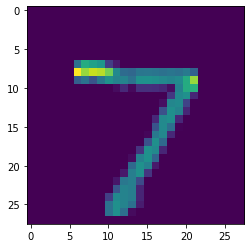

In [31]:
plt.imshow(x_test[0])
plt.show

It's indeed, 7.